# Ozone and Weather data gathering (4 stations: BETN012, BETN066, BETN073, BETN121)

### Plain txt file to dataframe

Background-rural both for Ozone (O3 - Max daily 8-hour mean *max8h* ozone concentrations) is being read from disk as a CSV file (Older database: https://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-7) for the stations in Belgium: BETN012, BETN066, BETN073, BETN121.

Min date: 1990-01-01 00:00:00, Max Date: 2011-12-31 00:00:00
Min date: 1990-01-01 00:00:00, Max Date: 2011-12-31 00:00:00
Min date: 1990-01-01 00:00:00, Max Date: 2011-12-31 00:00:00
Min date: 1990-01-01 00:00:00, Max Date: 2011-12-31 00:00:00


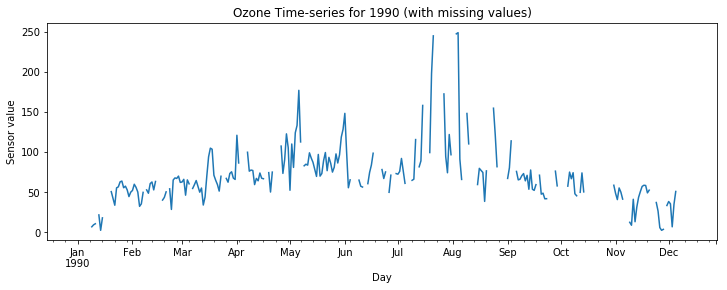

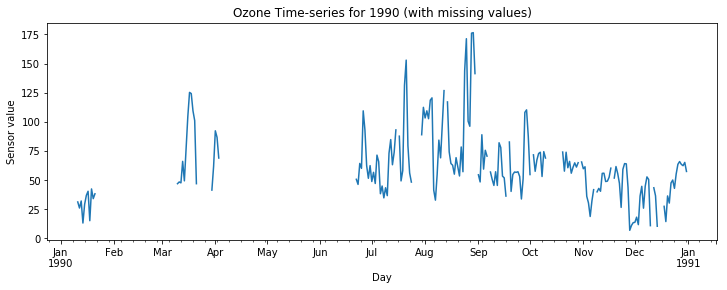

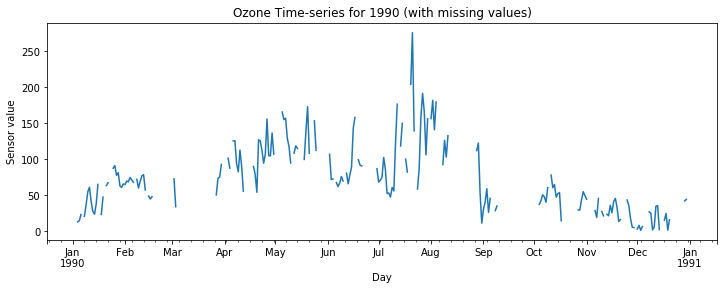

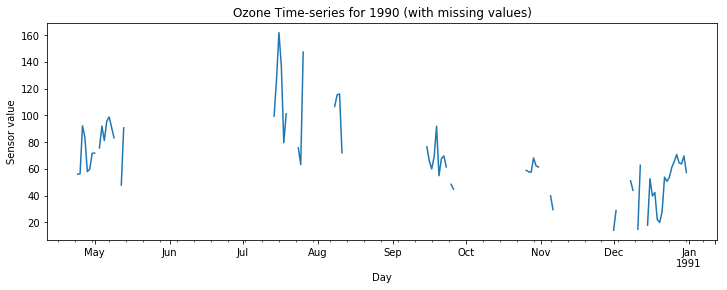

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta
from numpy import genfromtxt

fnames = ["AirBase_BE_v7/BETN0120000700100dymax.1-1-1990.31-12-2011", "AirBase_BE_v7/BETN0660000700100dymax.1-1-1990.31-12-2011",
          "AirBase_BE_v7/BETN0730000700100dymax.1-1-1990.31-12-2011", "AirBase_BE_v7/BETN1210000700100dymax.1-1-1990.31-12-2011"]
stationLabels = ['O3_BETN012','O3_BETN066','O3_BETN073','O3_BETN121']
columnsLabels = ['O3_BETN012','O3_BETN066','O3_BETN073','O3_BETN121','PARCS','CI','RSN','SST','ISTL1','ISTL2','ISTL3','ISTL4',
                 'SWVL1','SWVL2','SWVL3','SWVL4','10FG','LSPF','CAPE','SP','W','STL1','SD','LSP','CP','SF','SSHF','MSL','BLH',
                 'TCC','10U','V','2T','2D','SSRD','STL2','STRD','SSR','TTR','E','STL3','LCC','MCC','HCC','SRC','MX2T','MN2T',
                 'RO','TCO3','TP','IEWS','SKT','STL4','FAL','FSR','O3_BETN012-1','O3_BETN066-1','O3_BETN073-1','O3_BETN121-1']

fname = fnames[0]
dfColumn = stationLabels[0]
columnNames = ['month']
for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
    columnNames.append(str(i))
    columnNames.append('validity{}'.format(i))
df1 = pd.read_csv(fname, sep='\t', names=columnNames, lineterminator='\n')
df1['month'] = pd.to_datetime(df1['month'])
minDate = min(df1['month'])
maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
print ("Min date: {}, Max Date: {}".format(minDate, maxDate))
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=columnsLabels)
for row in df1.itertuples(index=True, name='df1'): # Foreach month
    date = row[1]
    for columnIndex in range(1, df1.shape[1]): # Foreach day
        if columnIndex % 2 == 0: # Even column
            if row[columnIndex + 1] == 1: # If sensor reading valid
                currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day           
                ts.at[currentDate, dfColumn] = row[columnIndex] # Set value to time-series

for i in range(1, len(fnames)):
    fname = fnames[i]
    dfColumn = stationLabels[i]
    columnNames = ['month']
    for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
        columnNames.append(str(i))
        columnNames.append('validity{}'.format(i))

    df1 = pd.read_csv(fname, sep='\t', names=columnNames, lineterminator='\n')
    df1['month'] = pd.to_datetime(df1['month'])
    
    minDate = min(df1['month'])
    maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
    
#     ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=columnsLabels)
    print ("Min date: {}, Max Date: {}".format(minDate, maxDate))
    
    for row in df1.itertuples(index=True, name='df1'): # Foreach month
        date = row[1]
        for columnIndex in range(1, df1.shape[1]): # Foreach day
            if columnIndex % 2 == 0: # Even column
                if row[columnIndex + 1] == 1: # If sensor reading valid
                    currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day           
                    ts.at[currentDate, dfColumn] = row[columnIndex] # Set value to time-series
               
# Test plot stations

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.head(365)['O3_BETN012'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.head(365)['O3_BETN066'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.head(365)['O3_BETN073'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.head(365)['O3_BETN121'].plot(ax = ax);

Adding weather data into the dataframe:

In [3]:
# Read geo-weather data
weatherData = genfromtxt('ECMWF\BETN073_51vars_19900101To2000101.csv', delimiter=',')

columns = len(weatherData[0])
row = -1
column = -1
addedColumns = len(stationLabels)
O3lags = [0] * addedColumns

for dataRow in ts.itertuples(index=True, name='Pandas'):    
    date = dataRow[0]
    row += 1       
    if row < weatherData.shape[0] and column < weatherData.shape[1]:
        for column in range(columns):    
            ts.at[date, columnsLabels[column + addedColumns]] = weatherData[row][column] # Set value to time-series        
        if (row > 0):
            for i in range(len(stationLabels)):
                stationLabel = stationLabels[i]
                ts.at[date, stationLabel + '-1'] = O3lags[i] # Set lag value
    for j in range(len(stationLabels)):
        stationLabel = stationLabels[j]
        O3lags[j] = dataRow[j + 1] 

Time-series plot of O3, first 365 days (1990, with missing data):

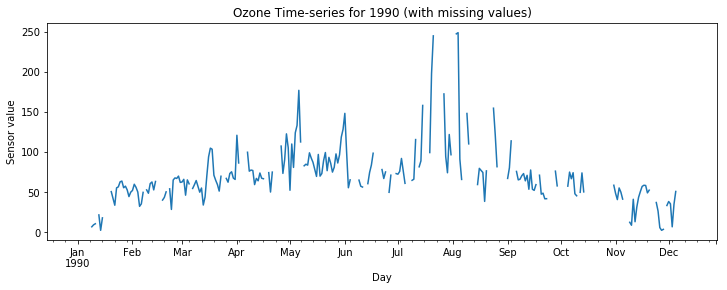

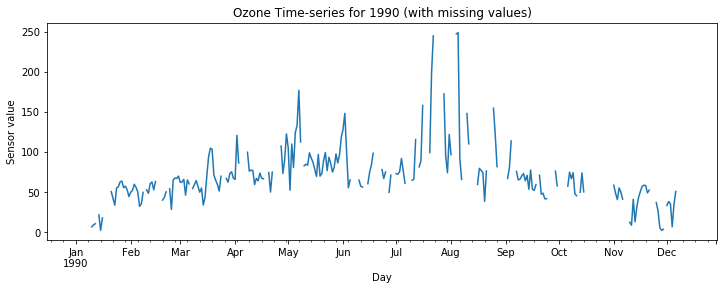

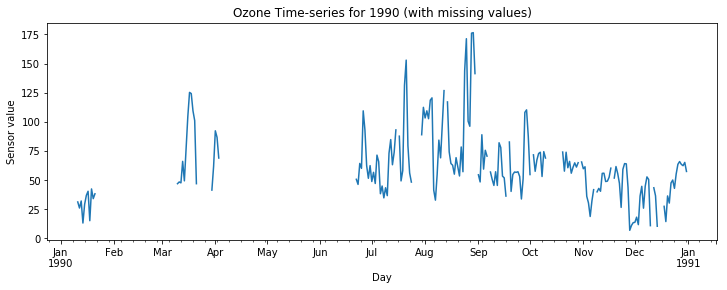

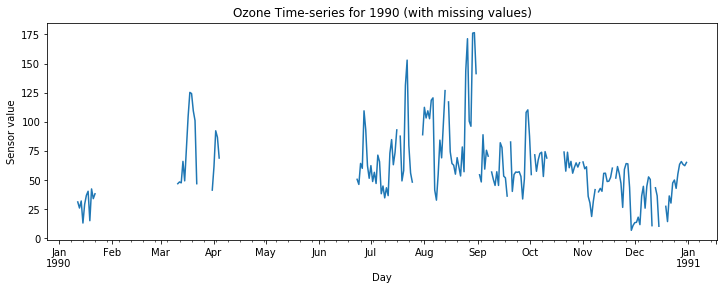

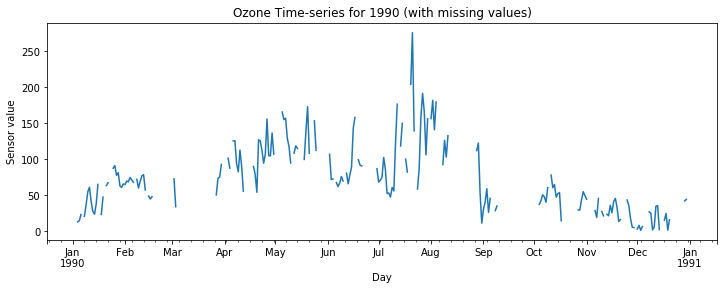

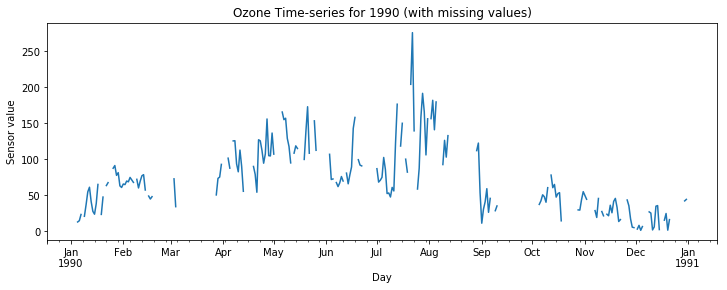

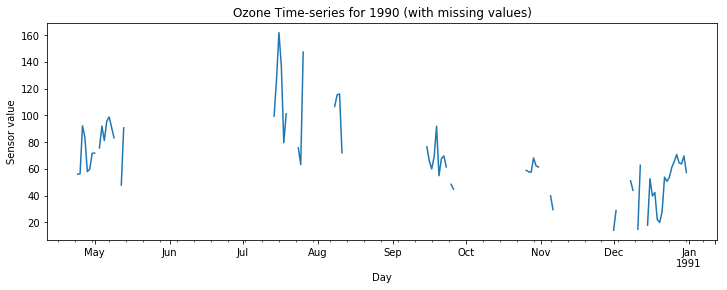

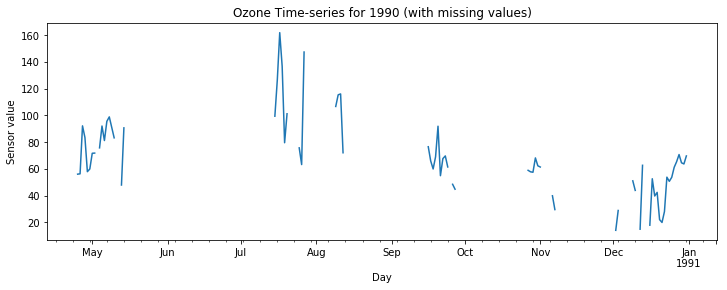

In [4]:
stationLabels = ['O3_BETN012','O3_BETN066','O3_BETN073','O3_BETN121']
for stationLabel in stationLabels:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Ozone Time-series for 1990 (with missing values)')
    ax.grid(True)
    ts.head(365)[stationLabel].plot(ax = ax);

    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Ozone Time-series for 1990 (with missing values)')
    ax.grid(True)
    ts.head(365)[stationLabel + '-1'].plot(ax = ax);

Plot other time-series variables (Temperature 2m):

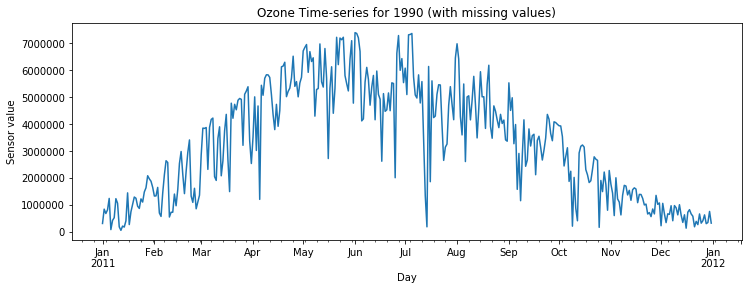

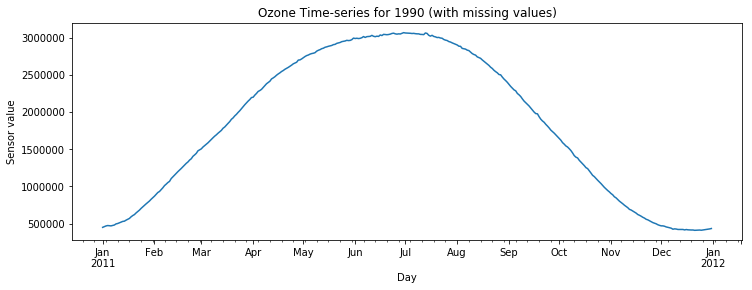

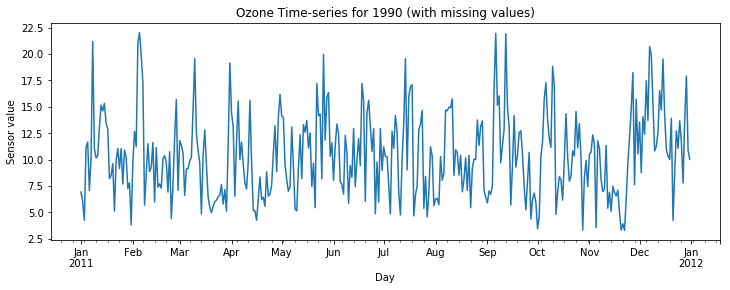

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
# ts.tail(365)['2T'].plot(ax = ax);
# ['O3', '10FG', 'BLH', '10U', '2T', 'SSR', 'SUND', 'O3-1']
#['O3','PARCS','CI','RSN','SST','ISTL1','ISTL2','ISTL3','ISTL4','SWVL1','SWVL2','SWVL3','SWVL4','10FG','LSPF','CAPE','SP','W','STL1','SD','LSP','CP','SF','SSHF','MSL','BLH','TCC','10U','V','2T','2D','SSRD','STL2','STRD','SSR','TTR','E','STL3','LCC','MCC','HCC','SRC','MX2T','MN2T','RO','TCO3','TP','IEWS','SKT','STL4','FAL','FSR','O3-1']
ts.tail(365)['SSR'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.tail(365)['PARCS'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.tail(365)['10FG'].plot(ax = ax);

Lag variable (-1 day):

In [ ]:
ts.tail(10)[stationLabels[0]]  

In [ ]:
ts.tail(10)[stationLabels[0] + '-1']

In [ ]:
ts.tail(10)[stationLabels[1]]

In [ ]:
ts.tail(10)[stationLabels[1] + '-1']

In [ ]:
ts.tail(10)[stationLabels[2]]

In [ ]:
ts.tail(10)[stationLabels[2] + '-1']

In [ ]:
ts.tail(10)[stationLabels[3]]

In [ ]:
ts.tail(10)[stationLabels[3] + '-1']

Not useful interpolations: Cubic and Spline (order 2-5+) seem to have very high leverage, skewing the original data:

Useful interpolations: 'from_derivatives' (piecewise polynomial interpolation) and linear. (Probably) the most interesting interpolation: PCHIP 1-d monotonic cubic interpolation (see:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator). Compared to the plain cubic interpolation, doesn't seem to skew the original data points. Pchip looks similar to the linear interpolation, with some extra smoothing.

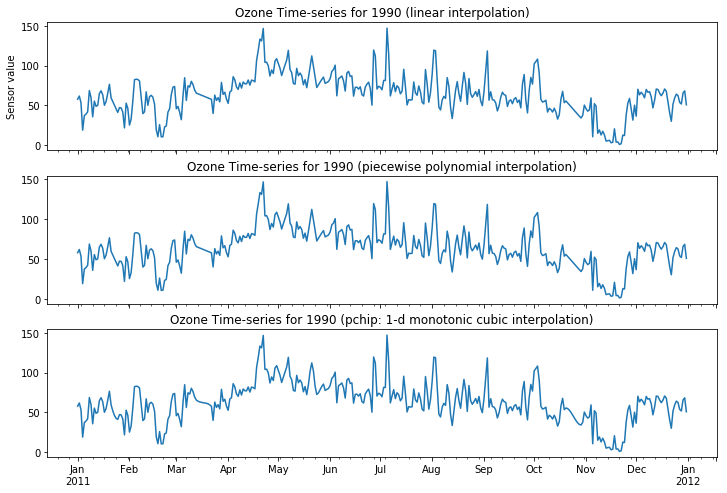

In [6]:
ts2a = ts.interpolate(method='linear',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='from_derivatives',limit=20,limit_direction='both')
ts2c = ts.interpolate(method='pchip',limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[0].set_title('Ozone Time-series for 1990 (linear interpolation)')
ax[1].set_title('Ozone Time-series for 1990 (piecewise polynomial interpolation)')
ax[2].set_title('Ozone Time-series for 1990 (pchip: 1-d monotonic cubic interpolation)')
ts2a.tail(365)['O3_BETN012'].plot(ax = ax[0]);
ts2b.tail(365)['O3_BETN012'].plot(ax = ax[1]);
ts2c.tail(365)['O3_BETN012'].plot(ax = ax[2]);

In [9]:
ts_interpolated = ts.interpolate(method='linear',limit=360,limit_direction='both')
ts_interpolated.head(10)['O3_BETN066']

1990-01-01    31.333
1990-01-02    31.333
1990-01-03    31.333
1990-01-04    31.333
1990-01-05    31.333
1990-01-06    31.333
1990-01-07    31.333
1990-01-08    31.333
1990-01-09    31.333
1990-01-10    31.333
Freq: D, Name: O3_BETN066, dtype: float64

In [10]:
ts_interpolated.head(30)['O3_BETN012-1']

1990-01-01    10.167000
1990-01-02    10.167000
1990-01-03    10.139167
1990-01-04    10.111333
1990-01-05    10.083500
1990-01-06    10.055667
1990-01-07    10.027833
1990-01-08    10.000000
1990-01-09     8.437500
1990-01-10     6.875000
1990-01-11     9.333000
1990-01-12    10.667000
1990-01-13    16.167000
1990-01-14    21.667000
1990-01-15     2.500000
1990-01-16    18.000000
1990-01-17    24.533400
1990-01-18    31.066800
1990-01-19    37.600200
1990-01-20    44.133600
1990-01-21    50.667000
1990-01-22    42.125000
1990-01-23    33.750000
1990-01-24    55.375000
1990-01-25    56.625000
1990-01-26    62.857000
1990-01-27    63.833000
1990-01-28    55.500000
1990-01-29    57.500000
1990-01-30    52.857000
Freq: D, Name: O3_BETN012-1, dtype: float64

In [11]:
ts_interpolated.head(30)['O3_BETN012']

1990-01-01    10.167000
1990-01-02    10.139167
1990-01-03    10.111333
1990-01-04    10.083500
1990-01-05    10.055667
1990-01-06    10.027833
1990-01-07    10.000000
1990-01-08     8.437500
1990-01-09     6.875000
1990-01-10     9.333000
1990-01-11    10.667000
1990-01-12    16.167000
1990-01-13    21.667000
1990-01-14     2.500000
1990-01-15    18.000000
1990-01-16    24.533400
1990-01-17    31.066800
1990-01-18    37.600200
1990-01-19    44.133600
1990-01-20    50.667000
1990-01-21    42.125000
1990-01-22    33.750000
1990-01-23    55.375000
1990-01-24    56.625000
1990-01-25    62.857000
1990-01-26    63.833000
1990-01-27    55.500000
1990-01-28    57.500000
1990-01-29    52.857000
1990-01-30    44.500000
Freq: D, Name: O3_BETN012, dtype: float64

In [12]:
# Store to time-series csv
file_name = "BETN_12_66_73_121_51vars_O3_O3-1_19900101To2000101.csv"
ts_interpolated.to_csv(file_name, sep=',', encoding='utf-8')